## EXERCISE: Predicting Survival on the Titanic

In [109]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic.csv', index_col='PassengerId')

titanic.Age.fillna(titanic.Age.mean())
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


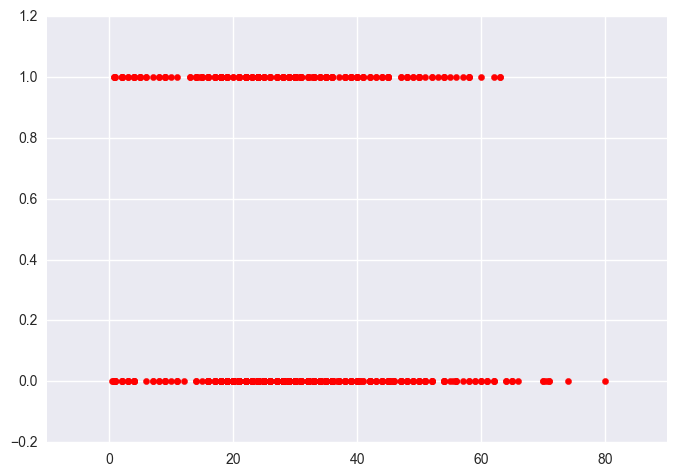

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6       NaN
7      54.0
8       2.0
9      27.0
10     14.0
11      4.0
12     58.0
13     20.0
14     39.0
15     14.0
16     55.0
17      2.0
18      NaN
19     31.0
20      NaN
21     35.0
22     34.0
23     15.0
24     28.0
25      8.0
26     38.0
27      NaN
28     19.0
29      NaN
30      NaN
       ... 
862    21.0
863    48.0
864     NaN
865    24.0
866    42.0
867    27.0
868    31.0
869     NaN
870     4.0
871    26.0
872    47.0
873    33.0
874    47.0
875    28.0
876    15.0
877    20.0
878    19.0
879     NaN
880    56.0
881    25.0
882    33.0
883    22.0
884    28.0
885    25.0
886    39.0
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, dtype: float64

In [106]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Sex']


Indicator = np.array(titanic['Sex'])
MaleFemaleIndicator = np.where(Indicator == 'female', 1, 0)

titanic['MaleFemaleIndicator'] = MaleFemaleIndicator

y = titanic['MaleFemaleIndicator']
X = titanic.Age

#plt.scatter(glass.al, glass.assorted)
plt.scatter(X, y, color='red')

plt.show()

X

#X = titanic[feature_cols]
#y = titanic.Survived

In [107]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [101]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [84]:
# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

1.0


In [87]:
# TASK 6 (BONUS): add Age as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)


0.686098654709


In [86]:
# TASK 7 (BONUS): Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print metrics.confusion_matrix(y_test, y_pred_class)

[[112  16]
 [ 54  41]]
